In [2]:
# JD Analysis Agent Testing

#This notebook focuses on testing and refining the Job Description Analysis Agent, which evaluates resumes against job descriptions.


In [3]:
## 1. Setup and Dependencies


In [90]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
import json
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Initialize LLM
llm = ChatOpenAI(model="gpt-4.1")


In [7]:
## 2. Test Data

#Let's create some test resumes and job descriptions to evaluate.


In [95]:
# Example resume for a software engineer
test_resume_1 = {
  "name": "Subrata Saha",
  "email": "saha.subrata@gmail.com",
  "phone": "09886643779",
  "address": "Bengaluru, India",
  "linkedin": "",
  "summary": "Started career in a telecom startup Ipunity (now Movius) as a full stack developer. A passionate Java, Scala, Python developer for 14 years only in product based companies. Got opportunities to develop 2 products from scratch (Insight and MDM for meta data aggregation). Expertise in writing optimized code with best possible design and algorithm in agile team with TDD.",
  "skills": [
    "Java",
    "Scala",
    "Python",
    "OOAD",
    "Architecture",
    "Integration",
    "Security patterns",
    "REST architecture",
    "Spring Boot",
    "JPA",
    "Apache Kafka",
    "JMS",
    "Apache ActiveMQ",
    "Apache Spark",
    "Cassandra",
    "HDFS",
    "AWS",
    "Helm chart",
    "Terraform",
    "Kubernetes",
    "Istio"
  ],
  "experience": [
    {
      "company": "Oracle",
      "role": "Micro Service developer for IAM and KMS",
      "location": "Bangalore",
      "duration": "Since May 2018",
      "responsibilities": [
        "Managing LCM operation for all rest endpoints to create Oauth client and resource for identity requirement.",
        "Autz layer for microservice for condition based authorization for each rest call based on policy evaluation.",
        "Enabling Service Mesh and Side car for microservices for service to service encrypted communication using Istio.",
        "Generating MEK/DEK related rest services for KMS to talk to HSM using Luna client.",
        "Deploying Services in Oracle cloud using helm chart, terraform, kubernetes, istio."
      ]
    },
    {
      "company": "Cisco",
      "role": "Microservice developer for on prem and AWS in Head-end",
      "location": "Bangalore",
      "duration": "Jan 2010 - Jan 2018",
      "responsibilities": [
        "Creating micro server components for sending targeted meta data for OTT solutions.",
        "Practiced non-negotiable factors like writing optimal data structure, best design principles, optimal server hit, optimal memory usage and quality code.",
        "Components for sending only OTT meta data to smart devices using Spring Boot, Java.",
        "Aggregate logs from micro components and finding relevant metrics using rest, kafka, hdfs, spark, scala, oozie.",
        "Micro service component for sending OTT rich meta data using Spring boot and Eureka server.",
        "Exposing API to smart devices directly to consume using spring rest API over hypermedia as json.",
        "Designing and coding of various in house custom frameworks in java and other components and automation using python.",
        "JVM Performance tuning for GC before every major release.",
        "Coaching, mentoring, pair programming on critical feature."
      ]
    },
    {
      "company": "Facetime communication (Actiance)",
      "role": "Developer",
      "location": "Bangalore",
      "duration": "July 2005 - Jan 2008",
      "responsibilities": [
        "Developed product Insight (Data lake from various data center) from scratch.",
        "ETL reporting tool developed from scratch.",
        "Designed and coded the transport part using Apache ActiveMQ and roll up engine using Java."
      ]
    },
    {
      "company": "Ipunity",
      "role": "Developer",
      "location": "Bangalore",
      "duration": "Jan 2008 - Jan 2010",
      "responsibilities": [
        "Developed tons of feature on UnifiedMessaging product.",
        "Increased interaction between sub systems by 60% by developing JMS Message bus using java, oracle advanced queue.",
        "Developed SMS sending from product web UI.",
        "Sending video mail from web UI using java mail."
      ]
    }
  ],
  "education": [
    {
      "degree": "Master in Computer Application",
      "institution": "GU",
      "year": "January 2005",
      "details": "Rank-6th, Distinguished programmer of the class and secured highest ever mark in Data structure till date."
    },
    {
      "degree": "PGDIT",
      "institution": "MAHE",
      "year": "December 2001",
      "details": "Studied Digital system and Java programming with Data structure."
    },
    {
      "degree": "B.Sc (Physics)",
      "institution": "",
      "year": "December 2000",
      "details": "Studied Astrophysics, Modern Physics, Atomic Physics, Heat and Thermodynamics, Electronics, Quantum mechanics etc."
    }
  ],
  "certifications": [],
  "projects": [
    {
      "name": "Stars Messenger",
      "description": "Developed https://itunes.apple.com/app/stars-messenger/id919659172 using Kraken and XMPP."
    },
    {
      "name": "Android App for delivery tracking",
      "description": "Developed using Materialised design, Retrofit, FCM, Fabric, Greenrobot, Map and middleware in AWS using event driven architecture using kafka and reactive framework webflux for spring boot."
    }
  ]
}

# Example job description for a senior software engineer
test_jd_1 = {
  "title": "Technical Lead",
  "location": "Bengaluru, India",
  "reporting_to": "Director of Engineering",
  "experience": "6-10 years",
  "responsibilities": [
    "Lead a team of 3-5 software engineers and own delivery of moderately complex software products",
    "Review and approve estimates, designs, code, and test cases",
    "Translate requirements into technical tasks",
    "Design scalable, available, performant cloud-based architectures",
    "Deliver MVPs in weeks, not months",
    "Work closely with leadership and customer teams",
    "Collaborate with industry veterans to make technical decisions"
  ],
  "culture_fit": [
    "Eager to work with experienced software leaders",
    "Excited to learn new technologies and architectures",
    "Enjoy solving complex technical challenges",
    "Value remote/hybrid collaboration",
    "Bring energy and open communication to teams"
  ],
  "required_skills": [
    "Team leadership",
    "Cloud architecture design",
    "Agile software delivery",
    "Backend development (Java, Spring, Python/Django, Node.js, .NET)",
    "Frontend development (React, Angular, JavaScript, TypeScript)",
    "Database systems (PostgreSQL, MySQL, Oracle, MongoDB, DynamoDB, Cassandra)"
  ],
  "preferred_skills": [
    "Mobile development (Flutter, React Native, Android, Swift, Objective-C)",
    "DevOps tooling (AWS, Docker, Kubernetes, Jenkins, Bamboo, CodePipeline)",
    "Testing tools (Jest, Cypress)",
    "UI libraries (Material-UI, Bootstrap)",
    "Project tracking and collaboration tools (JIRA, Crucible)"
  ],
  "education": "BS in Computer Science or related field"
}

core_values1 = {
  "company_values": [
    {
      "value": "Take ownership",
      "description": "Take responsibility for tasks, outcomes, and problems. Act like an owner and proactively solve issues."
    },
    {
      "value": "Learn and be curious",
      "description": "Continuously seek new knowledge, ask questions, and explore better ways of doing things. Stay open-minded and eager to improve."
    },
    {
      "value": "Put customers first",
      "description": "Always prioritize customer needs, satisfaction, and long-term trust. Make decisions that create value for customers."
    },
    {
      "value": "Think big",
      "description": "Look beyond short-term or small goals. Aim for bold, ambitious solutions that can create large-scale impact."
    },
    {
      "value": "Commit, lead every day",
      "description": "Stay dedicated to your work. Lead by example daily, showing consistency, responsibility, and initiative."
    },
    {
      "value": "Bias for action",
      "description": "Prefer taking quick, thoughtful action over waiting too long. Make progress even when full information isn't available."
    },
    {
      "value": "Show perseverance & grit",
      "description": "Stay persistent through challenges and setbacks. Keep going despite difficulties or failures."
    },
    {
      "value": "Show empathy",
      "description": "Understand and consider the feelings, perspectives, and situations of others. Act with kindness and compassion."
    },
    {
      "value": "Act with integrity",
      "description": "Be honest, ethical, and transparent. Do the right thing even when it's hard or when no one is watching."
    },
    {
      "value": "Be open to criticism",
      "description": "Accept feedback and criticism without defensiveness. Use it as a tool for growth and self-improvement."
    }
  ]
}




In [119]:
import json
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
# Example company values and culture && Resume DATA
company_values = {
  "company_values": [
    {
      "value": "Take ownership",
      "description": "Take responsibility for tasks, outcomes, and problems. Act like an owner and proactively solve issues."
    },
    {
      "value": "Learn and be curious",
      "description": "Continuously seek new knowledge, ask questions, and explore better ways of doing things. Stay open-minded and eager to improve."
    },
    {
      "value": "Put customers first",
      "description": "Always prioritize customer needs, satisfaction, and long-term trust. Make decisions that create value for customers."
    },
    {
      "value": "Think big",
      "description": "Look beyond short-term or small goals. Aim for bold, ambitious solutions that can create large-scale impact."
    },
    {
      "value": "Commit, lead every day",
      "description": "Stay dedicated to your work. Lead by example daily, showing consistency, responsibility, and initiative."
    },
    {
      "value": "Bias for action",
      "description": "Prefer taking quick, thoughtful action over waiting too long. Make progress even when full information isn't available."
    },
    {
      "value": "Show perseverance & grit",
      "description": "Stay persistent through challenges and setbacks. Keep going despite difficulties or failures."
    },
    {
      "value": "Show empathy",
      "description": "Understand and consider the feelings, perspectives, and situations of others. Act with kindness and compassion."
    },
    {
      "value": "Act with integrity",
      "description": "Be honest, ethical, and transparent. Do the right thing even when it's hard or when no one is watching."
    },
    {
      "value": "Be open to criticism",
      "description": "Accept feedback and criticism without defensiveness. Use it as a tool for growth and self-improvement."
    }
  ]
}

# Example candidate profile with strong cultural alignment
resume_data = {
  "personal_info": {
    "full_name": "Kirtan Shah",
    "email": "shahkirtan2003@gmail.com",
    "phone": "+91-9408393973",
    "location": {
      "city": "",
      "state": "",
      "country": "",
      "postal_code": "",
      "full_address": ""
    },
    "linkedin": "/linkedinKirtan Shah",
    "github": "/githubKirtan Shah",
    "portfolio": "",
    "other_links": []
  },
  "professional_summary": "",
  "work_experience": [
    {
      "job_title": "Software Developer Intern",
      "company": "Kickdrum",
      "location": "Bangalore, India",
      "start_date": "Jan 2024",
      "end_date": "Jun 2024",
      "is_current": False,
      "duration": "",
      "responsibilities": [
        "Underwent through In-Depth training on Full Stack Development & Project Management",
        "Mastered Frontend (JavaScript, TypeScript, React Framework) and Backend (Java, Spring Boot, Node.js, Express.js) development along with AWS cloud services",
        "Contributed to a client project of TestRail in PHP with the CodeIgniter framework, adhering to Agile SDLC practices and maintaining a Jira board"
      ],
      "achievements": [],
      "technologies_used": [
        "JavaScript",
        "TypeScript",
        "React",
        "Java",
        "Spring Boot",
        "Node.js",
        "Express.js",
        "AWS",
        "PHP",
        "CodeIgniter",
        "Jira",
        "Jenkins"
      ]
    },
    {
      "job_title": "Product Engineering Intern",
      "company": "Sprinklr",
      "location": "Gurugram, India",
      "start_date": "May 2023",
      "end_date": "June 2023",
      "is_current": False,
      "duration": "",
      "responsibilities": [
        "Worked on Failure Alerting Mechanism and Risk Mitigation",
        "Built a real-time Failure Alerting Mechanism using Springboot, Flask, and the ELK stack",
        "Utilized a dataset of more than 10 million data points to train an analytical model",
        "Executed various strategies for spotting unusual shifts in the system",
        "Developed a Kibana Monitoring Dashboard integrated with an Elasticsearch index"
      ],
      "achievements": [],
      "technologies_used": [
        "Springboot",
        "Flask",
        "ELK stack",
        "Kibana",
        "Elasticsearch"
      ]
    },
    {
      "job_title": "Batch Representative of Programming Club",
      "company": "DAIICT",
      "location": "Gandhinagar, India",
      "start_date": "Jul 2021",
      "end_date": "Aug 2022",
      "is_current": False,
      "duration": "",
      "responsibilities": [
        "Successfully managed 5 Programming Sessions and 6 Programming Contests"
      ],
      "achievements": [],
      "technologies_used": []
    },
    {
      "job_title": "Problem Coordinator of i.Fest 2022 Coding Event",
      "company": "",
      "location": "Gandhinagar, India",
      "start_date": "Oct 2022",
      "end_date": "Dec 2022",
      "is_current": False,
      "duration": "",
      "responsibilities": [
        "Problem Setter and Coordinator of a rated coding contest on CodeChef named FizzBuzz"
      ],
      "achievements": [],
      "technologies_used": []
    }
  ],
  "education": [
    {
      "degree": "B.Tech",
      "field_of_study": "Information & Communication Technology",
      "institution": "Dhirubhai Ambani Institute of Information and Communication Technology",
      "location": "Gandhinagar, India",
      "graduation_date": "",
      "gpa": "8.0",
      "honors": [],
      "relevant_coursework": [
        "Data Structures and Algorithms",
        "Object Oriented Programming",
        "Design and Analysis of Algorithm",
        "Database Management system",
        "Distributed Systems"
      ]
    },
    {
      "degree": "Class 12th",
      "field_of_study": "",
      "institution": "Vividhlakshi Vidhya mandir",
      "location": "Palanpur, Gujarat, India",
      "graduation_date": "July 2020",
      "gpa": "86.33%",
      "honors": [],
      "relevant_coursework": []
    }
  ],
  "skills": {
    "technical_skills": [
      "Git/GitHub",
      "Jira",
      "Node.js",
      "Spring Boot",
      "MongoDB",
      "Elasticsearch",
      "Kibana",
      "React",
      "IntelliJ IDEA"
    ],
    "programming_languages": [
      "C/C++",
      "Java",
      "Python",
      "JavaScript",
      "PHP",
      "SQL"
    ],
    "frameworks": [
      "React",
      "Spring Boot",
      "Node.js",
      "Express.js",
      "CodeIgniter"
    ],
    "databases": [
      "MongoDB",
      "Elasticsearch"
    ],
    "tools": [
      "Git/GitHub",
      "Jira",
      "IntelliJ IDEA",
      "Jenkins"
    ],
    "soft_skills": [
      "Teamwork",
      "Communication",
      "Customer Service",
      "Multitasking",
      "Enthusiastic",
      "Conflict Management",
      "Problem Solving",
      "Decisiveness",
      "Planning"
    ],
    "languages": []
  },
  "projects": [
    {
      "name": "StayConnect",
      "description": "Deployed a Single-Point solution to efficiently cater to all needs of the Residential Management System.",
      "duration": "March 2022 - May 2022",
      "technologies": [
        "MERN stack",
        "ER-Diagrams",
        "Relational Model",
        "Normalization"
      ],
      "url": "",
      "github_url": "",
      "highlights": [
        "Developed a web application using the MERN stack",
        "Successfully incorporated essential features, including User actions management, user login signup and handling user registration or update credentials"
      ]
    },
    {
      "name": "StopIt",
      "description": "StopIt is a Chrome Extension built with JavaScript, designed to bolster productivity by limiting access to specified websites.",
      "duration": "October 2022 - December 2022",
      "technologies": [
        "JavaScript",
        "Chrome APIs"
      ],
      "url": "",
      "github_url": "",
      "highlights": [
        "Used Storage and Tabs Chrome APIs to block the flagged site using its URL"
      ]
    }
  ],
  "certifications": [],
  "awards": [
    {
      "title": "GeeksForGeeks Summer Break challenge",
      "organization": "GeeksForGeeks",
      "date": "",
      "description": "Secured air 17 among 600+ participants."
    },
    {
      "title": "Joint Entrance Exam (JEE)",
      "organization": "",
      "date": "",
      "description": "Got 99.79 Percentile Rank (Top 0.2% out of 12,00,000+ students) in Physics and overall of 99.21 Percentile Rank."
    }
  ],
  "publications": [],
  "volunteer_experience": [],
  "custom_sections": {},
  "metadata": {
    "parsed_date": "",
    "parser_version": "",
    "confidence_score": 0,
    "parsing_notes": []
  }
}

uniqueness_definition = {
  "uniqueness_definition": "Uniqueness in this context refers to candidates who possess practical, in-depth experience with advanced Large Language Model (LLM) technologies and frameworks. This includes not only proficiency with these tools, but also tangible project work or real-world contributions demonstrating applied expertise.",
  "examples": [
    "Hands-on experience building applications with LangChain, LangGraph, or LangFlow",
    "Successfully implemented Retrieval-Augmented Generation (RAG) in production projects",
    "Contributed code, documentation, or modules to LLM open source projects",
    "Published or demoed real-world LLM-powered tools, apps, or workflows",
    "Integrated LLMs into enterprise or client-facing solutions with measurable impact",
    "Created educational content or led workshops on LLMs and their ecosystem",
    "Demonstrated innovative use cases or novel architectures using LLM frameworks"
  ]
}

custom_criterias = {
    "custom_criterias" : [
        {
            "name" : "Past Success",
            "description" : """
            In past we have noticed that we hired the candidates who come from there collages are became great employees and have been successful in their roles. So we want to hire the candidates who come from there collages. here is the Ranked list of collages that we have hired from in past: 
            1. DAIICT, Gandhinagar 
            2. MNIT Jaipur, 
            3. VIT Vellore, 
            4. NIT Patna,
            5. Manipal University,
            6. M.S. Ramaiah Institute of Technology,
            7. Jaypee Institute of Information Technology,
            8. Thapar Institute of Engineering and Technology,
            """
        },
        {
            "name": "Diversity Hiring",
            "description": """
            We have observed that building teams with members from diverse backgrounds and experiences leads to greater innovation and success within our company. We want to prioritize candidates who bring diversity to the organization in terms of gender, ethnicity, socioeconomic background, educational path, or life experiences. Candidates who have overcome unique challenges or contributed to inclusive environments are especially valued.
            Specific examples include:
            1. Women and non-binary candidates applying for technical roles
            2. Candidates from underrepresented communities or minority groups
            3. First-generation college graduates
            4. Candidates who studied at colleges or regions not traditionally represented in our company
            5. Candidates who have demonstrated leadership or participation in diversity, equity, and inclusion (DEI) initiatives
            6. Candidates with international education or work experience
            7. Individuals who have overcome significant personal or professional challenges
            """
      },
  

    ] 
}
import json
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# 1️⃣ Initialize LLM
llm = ChatOpenAI(
    model="gpt-4.1",   
    temperature=0.5,
    top_p=0.90,
    max_tokens=1800
)

# 2️⃣ Cultural Fit + Uniqueness Agent Function
def cultural_uniqueness_agent(state):
    combined_prompt = PromptTemplate(
        input_variables=[
            "resume_json",
            "core_values_json",
            "uniqueness_definition",
            "custom_criteria"
        ],
        template="""
You are an expert HR and talent evaluation AI.

Your task is to judge BOTH the *cultural fit* and *uniqueness* of the candidate, plus assess each custom criteria, strictly based on the explicit data in the resume. You must follow the rules below with no assumptions.

---

## PART 1: Cultural Fit

- Carefully review the resume and the company's core values (JSON format: each with 'value' and 'description').
- Only use explicit evidence (projects, roles, achievements, behavioral statements).
- If a core value is only listed in skills (not demonstrated), do **not** score it as a strong match.
- Score for each core value individually: strong match, partial match, or no match (with justification).
- Follow this guideline for the overall cultural fit score (integer 0-10):

    * 0-1: No core values matched & any anti-cultural patterns present
    * 2-3: Weak/vague match for 1 value &/or anti-cultural signals
    * 4-5: Strong match for 1 value OR weak matches for 2-3 values
    * 6-7: Strong match for 2 values, some good behavioral signals & soft skills
    * 8-9: Strong match for 3 values, very strong cultural alignment and soft skills
    * 10: Strong match for 3+ values, extremely strong alignment and soft skills

---

## PART 2: Uniqueness & Custom Criteria

Definitions:
- **Uniqueness** means: {uniqueness_definition}

Custom Criteria (as provided):
{custom_criteria}

Resume Data:
{resume_json}

Company Core Values:
{core_values_json}

**Instructions:**
- Review the resume for evidence of uniqueness as defined above.
- For "uniqueness":
    - Assign a score from 0 to 10 (0 = no evidence, 10 = truly outstanding/rare, 5 = some moderate uniqueness, etc)
    - Write a 2–3 line justification, citing explicit resume evidence.
- For each custom criterion:
    - Assign a score from 0 to 10 (0 = no evidence, 10 = extremely strong evidence)
    - Write a 2–3 line justification citing concrete evidence. If there is no explicit evidence, assign 0 and explain.
- DO NOT hallucinate or infer. Use only explicit content.

---

## Output Format (STRICT JSON):

{{
"cultural_fit_score": <0-10>,
"cultural_fit_justification": "<text>",
"core_value_scores": [
    {{
    "core_value": "<value>",
    "score": "<no/partial/strong>",
    "justification": "<1-2 lines why (w/ resume evidence)>"
    }},
    ...
],
"uniqueness_score": <0-10>,
"uniqueness_justification": "<text>",
"custom_criteria_scores": [
    {{
    "name": "<criteria_name>",
    "score": <0-10>,
    "justification": "<2-3 line reason>"
    }},
    ...
]
}}
"""
    )

    # 3️⃣ Prepare JSON strings
    resume_json = json.dumps(state['resume_data'], indent=2)
    core_values_json = json.dumps(state['core_values_data'], indent=2)
    custom_criteria_json = json.dumps(state['custom_criteria'], indent=2)
    uniqueness_definition = state['uniqueness_definition']

    # 4️⃣ Inject into full prompt
    prompt_text = combined_prompt.format(
        resume_json = resume_json,
        core_values_json = core_values_json,
        uniqueness_definition = uniqueness_definition,
        custom_criteria = custom_criteria_json
    )

    # 5️⃣ Call LLM
    response = llm.invoke(prompt_text)
    output_text = response.content.strip()

    # 6️⃣ Parse model response
    try:
        result_json = json.loads(output_text)
    except Exception as e:
        return {
            "error": "LLM returned invalid JSON",
            "raw_output": output_text
        }

    # 7️⃣ Return parsed outputs
    return {
        "cultural_fit_score": result_json.get("cultural_fit_score"),
        "cultural_fit_justification": result_json.get("cultural_fit_justification"),
        "core_value_scores": result_json.get("core_value_scores"),
        "uniqueness_score": result_json.get("uniqueness_score"),
        "uniqueness_justification": result_json.get("uniqueness_justification"),
        "custom_criteria_scores": result_json.get("custom_criteria_scores"),
    }

state = {
    "resume_data": test_resume_1,
    "core_values_data": company_values,
    "uniqueness_definition": uniqueness_definition["uniqueness_definition"],
    "custom_criteria": custom_criterias["custom_criterias"]
}

analysis_1 = cultural_uniqueness_agent(state)
print("Candidate 1 Cultural Fit & Uniqueness Analysis:")
print(json.dumps(analysis_1, indent=2))



KeyboardInterrupt: 

In [104]:
def analyze_jd_match(resume: dict, job_description: dict) -> dict:
    """AI recruiter agent with ATS-style scoring, detailed evaluation, and a screening verdict."""

    prompt = f"""
You are an expert AI recruiter following strict Applicant Tracking System (ATS) logic combined with semantic reasoning.

Your task is to analyze how well a candidate's resume matches a job description using ATS-compliant scoring rules, while also recognizing related experience when explicitly evidenced.

---
Resume (JSON input):
{json.dumps(resume, indent=2)}

Job Description (JSON input):
{json.dumps(job_description, indent=2)}
---

## SCORING RUBRIC (TOTAL: 100 pts; normalize to 10 scale)

| Category                  | Weight |
|---------------------------|--------|
| Required Skills Match      | 35 pts |
| Preferred Skills Match     | 20 pts |
| Experience Match           | 20 pts |
| Education Match            | 10 pts |
| Resume Quality & Strengths | 15 pts |

### STRICT EVALUATION RULES:

1️⃣ **Match required and preferred skills individually.**

- First check exact keyword presence.
- If not present, check for acceptable synonym or related term (explain).
- If not present at all, assign zero.

2️⃣ **Base evaluation only on explicit resume content.**  
Do not infer or hallucinate unstated experience.

3️⃣ **Apply knockout logic:**  
- If required skills or degree are fully missing, penalize the relevant score.

4️⃣ **Experience Evaluation:**  
- Compare required vs actual years.
- Match domain relevance.

5️⃣ **Resume Quality:**  
- Score based on clarity, structure, leadership signals, achievements, results.

---

## VERDICT DECISION LOGIC:

At the end, give a final boolean verdict:  
- `true` → Candidate is broadly relevant to the job domain, should proceed to next evaluation.
- `false` → Candidate is fundamentally irrelevant (wrong field, non-transferable background, zero domain match).

Examples of 'false' cases:
- Doctor applying to Full Stack role.
- Teacher applying to Data Scientist role without any relevant experience.
- No technical skills related to the job.

Be strict but fair. If there’s some relevant overlap, give `true`.  
If the domain is entirely mismatched, give `false`.

---

## OUTPUT FORMAT (Strict JSON)

{{
  "Raw Score (out of 100)": <integer>,
  "Normalized Score (out of 10)": <float rounded to 1 decimal place>,
  "Score Breakdown": {{
    "Required Skills Match": "<score>/35",
    "Preferred Skills Match": "<score>/20",
    "Experience Match": "<score>/20",
    "Education Match": "<score>/10",
    "Resume Quality & Strengths": "<score>/15"
  }},
  "Detailed Scoring": {{
    "Required Skills Match": [
      {{ "skill": "<Skill Name>", "score_awarded": <int>, "max_score": <int>, "comment": "<explanation with evidence>" }}
    ],
    "Preferred Skills Match": [
      {{ "skill": "<Skill Name>", "score_awarded": <int>, "max_score": <int>, "comment": "<explanation with evidence>" }}
    ],
    "Experience Match": [
      {{ "criteria": "Years of Experience", "required": "<years>", "actual": "<years>", "score_awarded": <int>, "max_score": <int>, "comment": "<explanation>" }}
    ],
    "Education Match": [
      {{ "criteria": "Degree", "required": "<degree>", "actual": "<degree>", "score_awarded": <int>, "max_score": <int>, "comment": "<explanation>" }}
    ],
    "Resume Quality & Strengths": [
      {{ "criteria": "<sub-criteria>", "score_awarded": <int>, "max_score": <int>, "comment": "<explanation>" }}
    ]
  }},
  "Key Strengths": [
    "Bullet 1", "Bullet 2", "Bullet 3"
  ],
  "Areas for Improvement": [
    "Suggestion 1", "Suggestion 2", "Suggestion 3"
  ],
  "Verdict": <true or false>
}}

IMPORTANT:
- All scoring must be directly traceable to resume content.
- Do not fabricate information.
- Ensure total category scores match sum of sub-scores.
- Only return clean, valid JSON. No extra text or markdown.
"""

    messages = [HumanMessage(content=prompt)]
    response = llm.invoke(messages)

    try:
        return json.loads(response.content)
    except json.JSONDecodeError:
        return {"raw_response": response.content}


In [103]:
## 4. Test the Agent


In [121]:
# Test with our first example
analysis_result = analyze_jd_match(test_resume_1, test_jd_1)
print(json.dumps(analysis_result, indent=2))


{
  "Raw Score (out of 100)": 82,
  "Normalized Score (out of 10)": 8.2,
  "Score Breakdown": {
    "Required Skills Match": "30/35",
    "Preferred Skills Match": "13/20",
    "Experience Match": "20/20",
    "Education Match": "10/10",
    "Resume Quality & Strengths": "9/15"
  },
  "Detailed Scoring": {
    "Required Skills Match": [
      {
        "skill": "Team leadership",
        "score_awarded": 3,
        "max_score": 7,
        "comment": "Mentions 'Coaching, mentoring, pair programming on critical feature' at Cisco, but no explicit team lead/management title. Partial match."
      },
      {
        "skill": "Cloud architecture design",
        "score_awarded": 7,
        "max_score": 7,
        "comment": "Explicit experience in deploying services in Oracle Cloud using helm chart, terraform, kubernetes, istio; 'Design scalable, available, performant cloud-based architectures' directly supported."
      },
      {
        "skill": "Agile software delivery",
        "score_a

In [13]:
## 5. Test with Different Scenarios


In [14]:
# Test with a less qualified candidate
test_resume_2 = {
    "full_name": "Jane Smith",
    "education": [
        {
            "degree": "BS Information Technology",
            "institution": "State University",
            "year": "2022"
        }
    ],
    "work_experience": [
        {
            "company": "StartUp Inc",
            "role": "Junior Developer",
            "duration": "2022-2024",
            "key_achievements": [
                "Developed frontend features",
                "Fixed bugs in production code"
            ]
        }
    ],
    "skills": [
        "JavaScript",
        "React",
        "HTML/CSS"
    ]
}

# Test with second example
analysis_result_2 = analyze_jd_match(test_resume_2, test_jd_1)
print(json.dumps(analysis_result_2, indent=2))


{
  "raw_response": "```json\n{\n  \"Overall Match Score\": 3,\n  \"Required Skills Match Analysis\": \"Jane's resume indicates her proficiency in JavaScript, fulfilling one of the required skills for the job. However, there is no mention of Python, cloud platforms, or microservices architecture, which are key requirements for the role.\",\n  \"Preferred Skills Match Analysis\": \"She demonstrates proficiency in React, which is listed among the preferred skills. Nonetheless, there are no indicators of experience with Node.js, Docker, or Kubernetes on her resume.\",\n  \"Experience Match Analysis\": \"The job description calls for '5+ years in software development,' but Jane's work experience as a Junior Developer suggests she has only been in the field for 2 years (2022-2024). This falls significantly short of the expectation.\",\n  \"Education Match Analysis\": \"Jane has a BS in Information Technology from State University, which aligns with the requirement of having a 'BS in Compute

In [15]:
## 6. Visualization of Results


Matplotlib is building the font cache; this may take a moment.


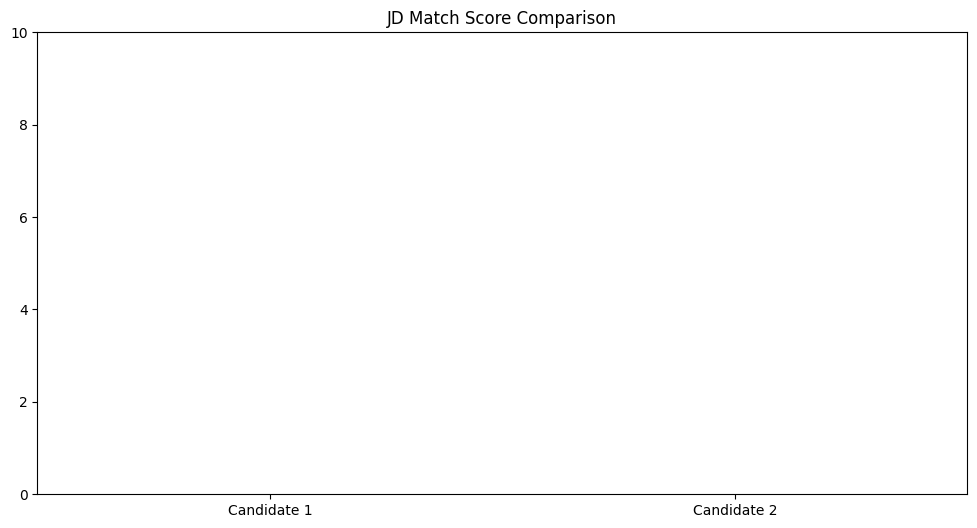

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison(results1, results2):
    """Plot a comparison of two analysis results."""
    plt.figure(figsize=(12, 6))
    
    scores = {
        'Candidate 1': results1.get('overall_match_score', 0),
        'Candidate 2': results2.get('overall_match_score', 0)
    }
    
    sns.barplot(x=list(scores.keys()), y=list(scores.values()))
    plt.title('JD Match Score Comparison')
    plt.ylim(0, 10)
    plt.show()

# Plot comparison
plot_comparison(analysis_result, analysis_result_2)


In [18]:
## 7. Refine the Analysis

#Based on the test results, we can refine our analysis approach.


In [19]:
def get_detailed_skill_match(resume: dict, jd: dict) -> dict:
    """Get a detailed breakdown of skill matches."""
    resume_skills = set(resume.get('skills', []))
    required_skills = set(jd.get('required_skills', []))
    preferred_skills = set(jd.get('preferred_skills', []))
    
    required_matches = resume_skills.intersection(required_skills)
    preferred_matches = resume_skills.intersection(preferred_skills)
    
    return {
        'required_skills_matched': list(required_matches),
        'required_skills_missing': list(required_skills - resume_skills),
        'preferred_skills_matched': list(preferred_matches),
        'preferred_skills_missing': list(preferred_skills - resume_skills),
        'additional_skills': list(resume_skills - (required_skills | preferred_skills))
    }

# Test the detailed skill match analysis
skill_analysis_1 = get_detailed_skill_match(test_resume_1, test_jd_1)
print("Candidate 1 Skill Analysis:")
print(json.dumps(skill_analysis_1, indent=2))

skill_analysis_2 = get_detailed_skill_match(test_resume_2, test_jd_1)
print("\nCandidate 2 Skill Analysis:")
print(json.dumps(skill_analysis_2, indent=2))


Candidate 1 Skill Analysis:
{
  "required_skills_matched": [
    "JavaScript",
    "Python"
  ],
  "required_skills_missing": [
    "Cloud platforms (AWS/GCP)",
    "Microservices architecture"
  ],
  "preferred_skills_matched": [
    "Docker",
    "Node.js",
    "React"
  ],
  "preferred_skills_missing": [
    "Kubernetes"
  ],
  "additional_skills": [
    "AWS"
  ]
}

Candidate 2 Skill Analysis:
{
  "required_skills_matched": [
    "JavaScript"
  ],
  "required_skills_missing": [
    "Cloud platforms (AWS/GCP)",
    "Python",
    "Microservices architecture"
  ],
  "preferred_skills_matched": [
    "React"
  ],
  "preferred_skills_missing": [
    "Docker",
    "Kubernetes",
    "Node.js"
  ],
  "additional_skills": [
    "HTML/CSS"
  ]
}
